In [1]:
import dataset

trainingDB = dataset.TrainingsetDB()
testDB = dataset.TestsetDB()

In [5]:
face = trainingDB.getFace(1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

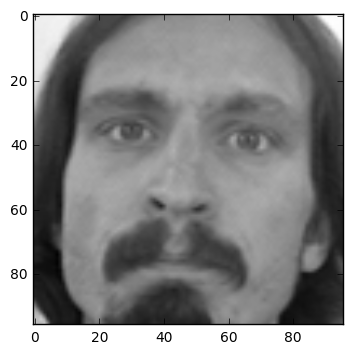

In [6]:
plt.imshow(face.image, cmap = 'gray')

In [5]:
featureImage = face.getFeatureImage(dataset.RIGHT_EYE_CENTER, (30, 10))

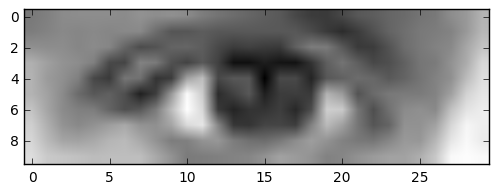

In [6]:
plt.imshow(featureImage, cmap = 'gray')

<function __main__.<lambda>>

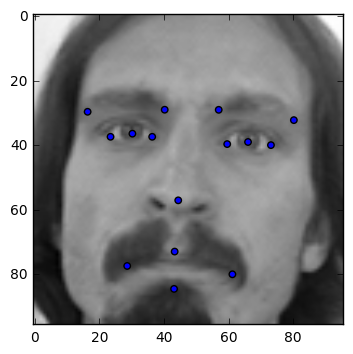

In [7]:
import matplotlib.patches as patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def showFace(face):
    fig,ax = plt.subplots()
    for key, value in face.features.items():
        ax.add_patch(patches.Circle(value,1))
    ax.imshow(face.image, cmap = 'gray')

showTrainingFace = lambda faceId : showFace(trainingDB.getFace(faceId))
interact(showTrainingFace, faceId=widgets.IntSlider(min=1,max=trainingDB.rows(),step=1,value=0))

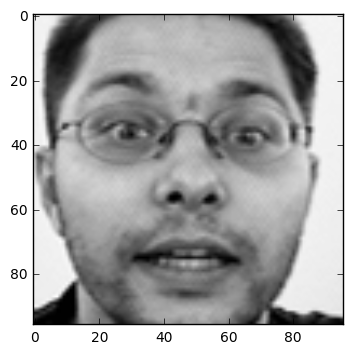

In [8]:
showFace(testDB.getFace(1))

In [9]:
import pandas as pd
means = pd.read_csv('means.csv', index_col='name')

In [10]:
for face in testDB.getFaces():
    for key,value in dataset.featuresNames.items():
        position = (means['position'][value + '_x'], means['position'][value + '_y'])
        face.setFeaturePosition(key, position)

In [11]:
testDB.write()

AttributeError: 'dict' object has no attribute 'iteritems'

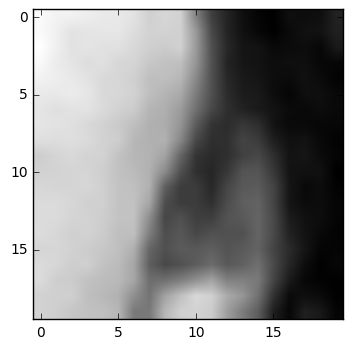

In [13]:
plt.imshow(trainingDB.randomSubImage(1, (20, 20), dataset.allFeatures), cmap = 'gray')

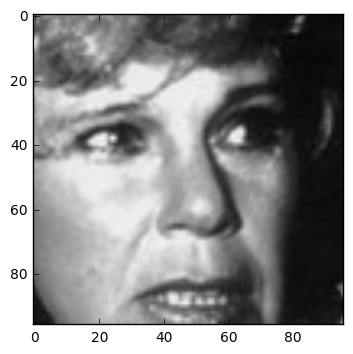

In [8]:
showTestFace = lambda faceId : showFace(testDB.getFace(faceId))
interact(showTestFace, faceId=widgets.IntSlider(min=1,max=testDB.rows(),step=1,value=0))

In [14]:
import numpy as np

dataset = np.load('faceFeatures_9216_normalized_labels_as_coord.npz')

In [15]:
dataset['y'][20]

array([ 0.44236365, -0.16621818, -0.46769091, -0.20683636,  0.25547272,
       -0.16621818,  0.58863634, -0.1580909 , -0.30518183, -0.19870909,
       -0.63021821, -0.19058181,  0.23923637, -0.40998182,  0.73619998,
       -0.30650908, -0.26456365, -0.45872727, -0.75209093, -0.40998182,
       -0.04516364,  0.25630909,  0.29610908,  0.69509089, -0.38643637,
        0.69509089, -0.02890909,  0.59759998, -0.04516364,  0.94700003], dtype=float32)

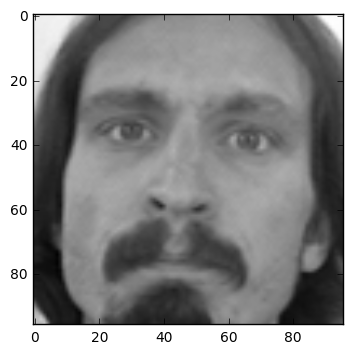

In [16]:
plt.imshow(dataset['data'][1].reshape(96, 96), cmap = 'gray')

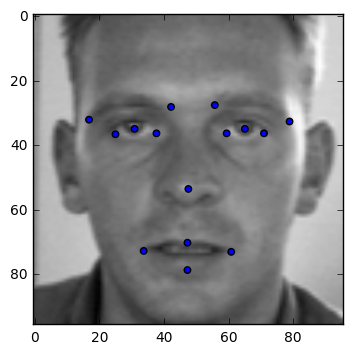

In [17]:
def showSample(dataset, sampleId):
    fig,ax = plt.subplots()
    image = dataset['data'][sampleId].reshape(96,96)
    coords = dataset['y'][sampleId]
    for i in range(0, 30, 2):
        x = (coords[i] + 1.0) / 2.0 * 96
        y = (coords[i + 1] + 1.0) / 2.0 * 96
        ax.add_patch(patches.Circle((x, y),1))
    ax.imshow(image, cmap = 'gray')
    
showSample(dataset, 3)